In [1]:
%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from pandas_datareader import data
from datetime import datetime
from dateutil import parser

yf.pdr_override()

In [2]:
datetime(year=2023, month=7, day=4)

datetime.datetime(2023, 7, 4, 0, 0)

In [3]:
# using the dateutil module you can parse dates from a variety of string formats
date = parser.parse("4th of July, 2023")
date

datetime.datetime(2023, 7, 4, 0, 0)

In [4]:
# once you have a datetime object, you can do things like printing the day of the week
date.strftime("%A")
# here we've used one of the standard string format codes for printing dates(%A) which you can read about in the strftime section of Python's datetime documentation other useful date utilities can be found in the dateutil module documentation
# a related package is pytz which contains tools for working with time zones
# the power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in
# where they break down is in large arrays of dates and times datetime objects are suboptimal compared to typed arrays of encoded dates

'Tuesday'

Typed arrays of times: NumPy's datetime64

In [5]:
# numpy's datetime64 dtype encodes dates as 64-bit integers and thus allows arrays of dates to be represented very compactly and operated on in an efficient manner the datetime64 requires a very specific input format
date = np.array("2023-07-04", dtype=np.datetime64)
date

array('2023-07-04', dtype='datetime64[D]')

In [6]:
# once we have dates in this form, we can quickly do vectorized operations on it
date + np.arange(12)

array(['2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
       '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
       '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-15'],
      dtype='datetime64[D]')

In [7]:
# because of the uniform type in numpy datetime64 arrays, this kind of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large
# one detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit
# datetime64 imposes a trade-off between time resolution and maximum time span for example if you want a time resolution of 1 nanosecond, you only have enough information to a encode a range of 2^64 nanoseconds, or just under 600 years numpy will infer the desired unit from the input for example here is a day-based datetime
np.datetime64("2023-07-04")

numpy.datetime64('2023-07-04')

In [8]:
# here is a minute-based datetime
np.datetime64("2023-07-04 12:00")

numpy.datetime64('2023-07-04T12:00')

In [9]:
# you can force any desired fundamental unit using one of many format codes for example here we'll force a nanaosecond-based time
np.datetime64("2023-07-04 12:59:59.50", "ns")
# for the types of data we see in the real world a useful default is datetime64[ns] as it can encode a useful range of modern dates with a suitably fine precision
# when the datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, but it lacks many of the convenient methods and functions provided by datetime and especially dateutil

numpy.datetime64('2023-07-04T12:59:59.500000000')

Dates and times in pandas: best of both worlds

In [10]:
# pandas builds upon all the tools just discussed to provide a timestamp object which combines the ease of use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. from a group of these timestamp objects, pandas can construct a DatetimeIndex that can be used to index data in a Series of DataFrame
# for example, we can use pandas tools to repeat the demonstration from above. we can parse a flexibly formatted string date and use format codes to output the day of the week
date = pd.to_datetime("4th of July, 2023")
date

Timestamp('2023-07-04 00:00:00')

In [11]:
date.strftime("%A")

'Tuesday'

In [12]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
               '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-15'],
              dtype='datetime64[ns]', freq=None)

Pandas time series: indexing by time

In [13]:
index = pd.DatetimeIndex(["2023-07-04", "2023-08-04", "2024-07-04", "2024-08-04"])
time_data = pd.Series([0, 1, 2, 3], index=index)
time_data

2023-07-04    0
2023-08-04    1
2024-07-04    2
2024-08-04    3
dtype: int64

In [14]:
# now that we have this data in a series, we can make use of any of the series indexing patters passing values that can be coerced into dates
time_data["2023-07-04":"2024-07-04"]

2023-07-04    0
2023-08-04    1
2024-07-04    2
dtype: int64

In [15]:
# there are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year
time_data["2023"]

2023-07-04    0
2023-08-04    1
dtype: int64

Pandas time series data structures

In [16]:
# for timestamps pandas provides the timestamp type as mentioned before this is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. the associated index structure is DatetimeIndex
# for time periods, pandas provides the period type. this encodes a fixed-frequency interval based on numpy.datetime64. the associated index structure is PeriodIndex
# for time deltas or durations, pandas provides the timedelta type. timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. the associated index structure is TimedeltaIndex
# the most fundamental is the timestamp and datetimeindex objects. it is more comon to use the pd.to_datetime() function passing a single date to pd.to_datetime() yields a timestamp. passing a series of dates by default yields a datetimeindex as you can see here
dates = pd.to_datetime(
    [datetime(2023, 7, 3), "4th of July, 2023", "2023-Jul-6", "07-07-2023", "20230708"]
)
dates

DatetimeIndex(['2023-07-03', '2023-07-04', '2023-07-06', '2023-07-07',
               '2023-07-08'],
              dtype='datetime64[ns]', freq=None)

In [17]:
# any datetimeindex can be converted to a period index with the to_period() function with the addition of a frequency code. here we'll use 'D' to indicate daily frequency
dates.to_period("D")

PeriodIndex(['2023-07-03', '2023-07-04', '2023-07-06', '2023-07-07',
             '2023-07-08'],
            dtype='period[D]')

In [18]:
# a timedeltaindex is created, for example, when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

regular sequences: pd.date_range()

In [19]:
# pandas offers a few functions to make creation of regular date sequences more convenient. pd.date_range() for timestamps, pd.period_range() for periods, and pd.timedelta_range() for time deltas.
# pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. by default, the frequency is one day
pd.date_range("2015-07-03", "2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# the date range can be specified not with a start and end point, but with a start point and a number of periods
pd.date_range("2015-07-03", periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# the spacing can be modified by altering the freq argument, which defaults to D. for example, here we construct a range of hourly timestamps
pd.date_range("2015-07-03", periods=8, freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
# to create regular sequences of period or time delta values, the simalar pd.period_range() and pd.timedelta_range() functions are useful. here are some monthly periods
pd.period_range("2015-07", periods=8, freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [23]:
# and a sequence of durations increasing by an hour
pd.timedelta_range(0, periods=6, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [24]:
# the monthly quarterly and annual freuencies are marked at the end of the specified period. by adding an S suffix to any of these, they instead will be marked at the beginning
# additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix in the same way the split-point of the weekly frequency can be modified by adding a three-letter weekday code
# on top oif this codes can be combined with numbers to specify other frequencies for example for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [25]:
# all of these short codes refer to specific instances of pandas time series offsets which can be found in the pd.tseries.offsets module. for example we can create a business day offset directly as follows
pd.date_range("2015-07-01", periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [26]:
# resampling, shifting, and windowing
# the ability to use dates and times as indices to intuitively organize and access data is an important piece of the pandas time series tools. the benifits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations
# we will take a look at a few of those here using some stock price data as an example. the pandas-datareader package knows how to import financial data from a number of available sources.
# this is an exqample using S&P 500 data, loaded with the datareader package
def get_yahoo_data(symbol, start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    return data.get_data_yahoo(tickers=symbol, start=start, end=end)


sp500 = get_yahoo_data("^GSPC", "2018-01-01", "2022-01-01")
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


In [27]:
# for simplicity, we'll use just the closing price
sp500 = sp500["Close"]

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_98023/2393049061.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


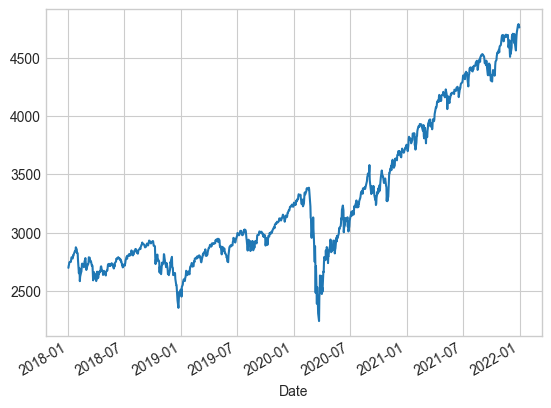

In [28]:
# we can visuilize this using the plot method, after the normal matplotlib setup
plt.style.use("seaborn-whitegrid")
sp500.plot()

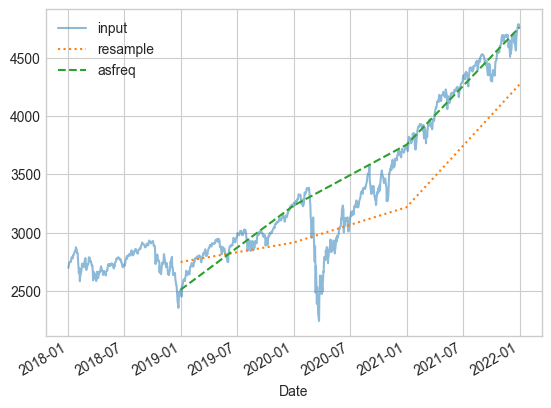

In [29]:
# resampling and converting frequencies
# one common need when dealing with time series data is resampling at a higher or lower frequency. this can be done using the resample() method, or the much simpler asfreq() method. the primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection
# we can compare what the two return when we downsample the sp500 data
# here we will resample the data at the end of business year
sp500.plot(alpha=0.5, style="-")
sp500.resample("BA").mean().plot(style=":")
sp500.asfreq("BA").plot(style="--")
plt.legend(["input", "resample", "asfreq"], loc="upper left")

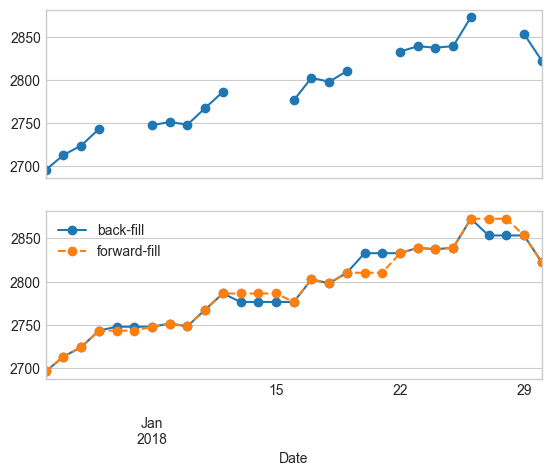

In [30]:
# at each point the resample reports the average of the previous year while asfreq reports the value at the end of the year
# for upsampling resample and asfreq are largely equivalent resample has more options available though
# we will resample the business day data at a daily frequency (i.e., including weekends)
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq("D").plot(ax=ax[0], marker="o")

data.asfreq("D", method="bfill").plot(ax=ax[1], style="-o")
data.asfreq("D", method="ffill").plot(ax=ax[1], style="--o")
ax[1].legend(["back-fill", "forward-fill"])
# because sp500 data only exists for business days the top panel has gaps representing NA values the bottom shows the differences between back-filling and forward-filling

Time Shifts

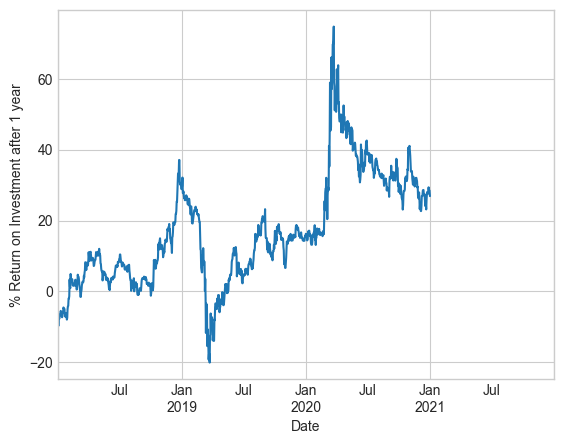

In [31]:
# another common time series-specific operation is shifting of data in time. for this pandas provides the shift() method which can be used to shift data by a given number of entries with time series data sampled at a regular frequency, this can give us a way to explore trends
# here we resample thhe data to daily values and shift by 364 to compute the 1 year return on investment for holding the sp500
sp500 = sp500.asfreq("D", method="pad")

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel("% Return on Investment after 1 year")

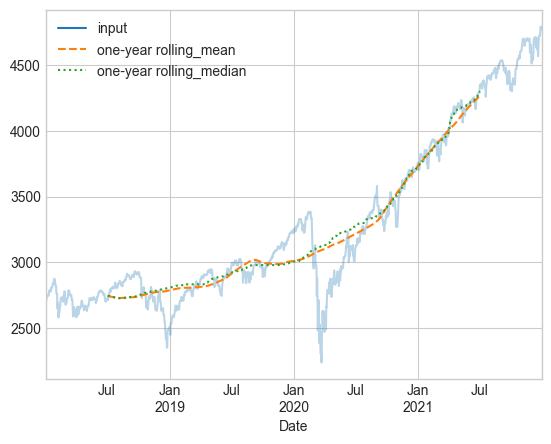

In [32]:
# rolling windows
# calculating a rolling statistic is acomplished via the rolling attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation
# for example we can look at the one year centered rolling mean and standard deviation of the stock prices
rolling = sp500.rolling(365, center=True)
data = pd.DataFrame(
    {
        "input": sp500,
        "one-year rolling_mean": rolling.mean(),
        "one-year rolling_median": rolling.median(),
    }
)
ax = data.plot(style=["-", "--", ":"])
ax.lines[0].set_alpha(0.3)
# as with groupby operations the aggregate() and apply() methods can be used for custom rolling computations

In [33]:
# example: visualizing seattle bicycle counts
# we can use pandas to read the csv output into a DataFrame we will specify that we want the dates to be parsed
data = pd.read_csv("Data/FremontBridge.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [34]:
# we can shorten the column names
data.columns = ["Total", "East", "West"]
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


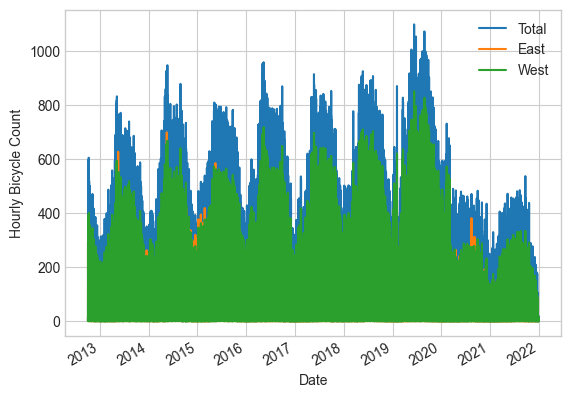

In [35]:
data.plot()
plt.ylabel("Hourly Bicycle Count")

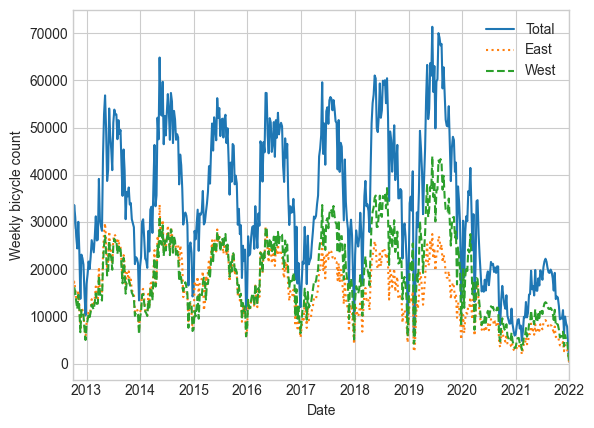

In [36]:
weekly = data.resample("W").sum()
weekly.plot(style=["-", ":", "--"])
plt.ylabel("Weekly bicycle count")

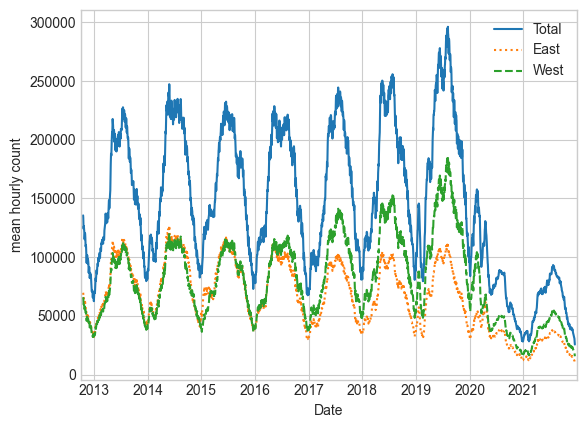

In [37]:
# this reveasls some trends people bicycle more in the summer than in the winter and even within a particular season the bicycle use varies from week to week an covid plays a role as we can see starting in 2020
# another option that comes in handy is the rolling mean utilizing the pd.rolling_mean() function
daily = data.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=["-", ":", "--"])
plt.ylabel("mean hourly count")

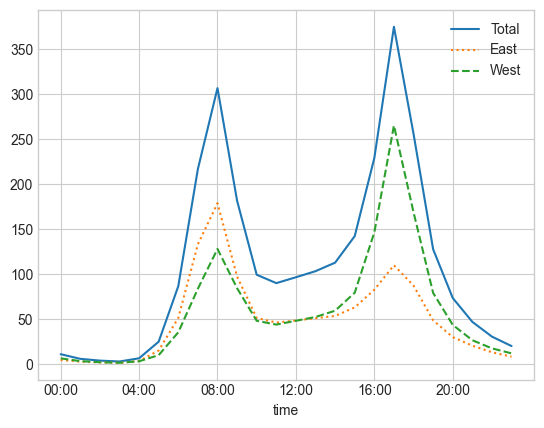

In [38]:
# while these smoothed data views are useful to get an idea of the general trend of the data they hide much of the interesting structure. for example we might want to look at the average traffic as a function of the time of the day using the groupby functionality
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=["-", ":", "--"])

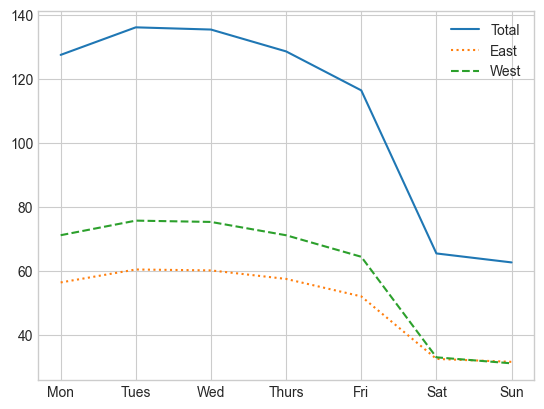

In [40]:
# the hourly traffic has a bimodal sequence with peaks around 8am and 5pm this is likely evidence of a strong component of commuter traffic crossing the bridge. this is further evidenced by the differences between the western sidewalk (generally used going toward downtown seattle) and the eastern sidewalk (generally used going away from downtown seattle)
# we also might be curious about how things change based on the day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
by_weekday.plot(style=["-", ":", "--"])
# this shows a string distinction between weekday and weekend totals with around twice as many average riders crossing the bridge on monday through friday than on saturday and sunday

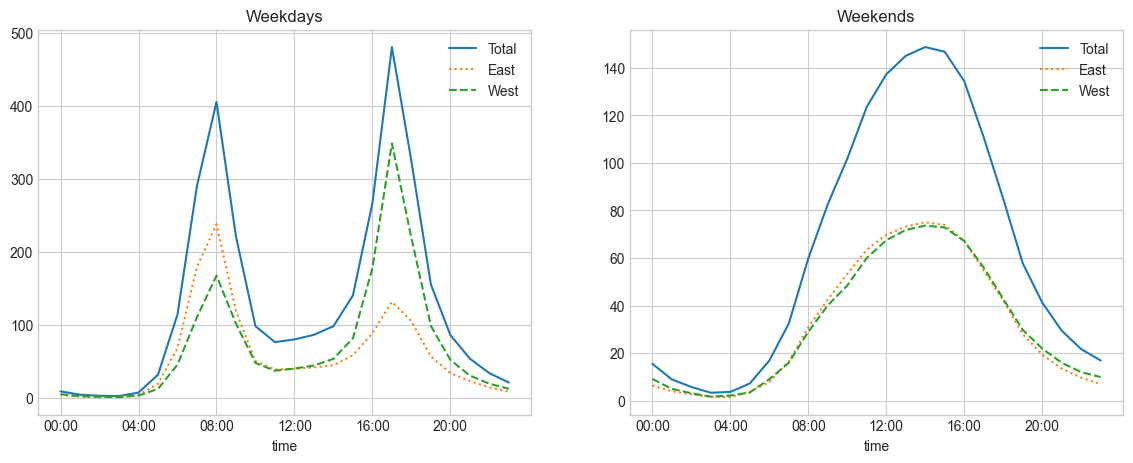

In [42]:
# lets do a compound groupby and look at the hourly trend on weekdays versus weekends we'll do this by grouping by both a flag marking the weekend and the time of day
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")
by_time = data.groupby([weekend, data.index.time]).mean()
# now we'll use some of the matplotlib tools to plot two panels side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc["Weekday"].plot(
    ax=ax[0], title="Weekdays", xticks=hourly_ticks, style=["-", ":", "--"]
)
by_time.loc["Weekend"].plot(
    ax=ax[1], title="Weekends", xticks=hourly_ticks, style=["-", ":", "--"]
)
# the result shows a bimodal commute pattern during the work week and a unimodal pattern during the weekends it may be interesting to look at the commute patters for each individual day of the week